In [1]:
import numpy
import csv
from sensor import *
import copy
import pandas as pd
import numpy as np
import time
import datetime
import sklearn.linear_model
import math
from pylab import *
# グラフをインラインで表示させる
%matplotlib inline

In [2]:
df_rr = pd.read_csv("train_data/rr.csv")
df_rs = pd.read_csv("train_data/rs.csv")
df_sr = pd.read_csv("train_data/sr.csv")
df_ss = pd.read_csv("train_data/ss.csv")

In [3]:
df_rr.columns

Index([u'now_sunny', u'now_rain', u'count_rain', u'count_freq', u'hum_80',
       u'hum_80_92', u'hum_92_', u'ill_0', u'ill_0_1000', u'ill_1000_15000',
       u'ill_15000_', u'dir_1', u'dir_2', u'dir_3', u'dir_4', u'dir_5',
       u'dir_6', u'diff_1', u'diff_2', u'diff_3', u'diff_4', u'diff_5',
       u'diff_6', u'velm_1', u'velm_2', u'velm_3', u'velm_4', u'velm_5',
       u'velm_6', u'velm_7'],
      dtype='object')

In [4]:
rr_len = len(df_rr.index)
rs_len = len(df_rs.index)
sr_len = len(df_sr.index)
ss_len = len(df_ss.index)

In [5]:
print('rr = ' + str(rr_len))
print('rs = ' + str(rs_len))
print('sr = ' + str(sr_len))
print('ss = ' + str(ss_len))

rr = 674
rs = 420
sr = 425
ss = 15874


In [6]:
ss_label = [1.0, 0.0, 0.0, 0.0]
sr_label = [0.0, 1.0, 0.0, 0.0]
rs_label = [0.0, 0.0, 1.0, 0.0]
rr_label = [0.0, 0.0, 0.0, 1.0]

In [7]:
sampler_rr = np.random.permutation(rr_len)
sampler_rs = np.random.permutation(rs_len)
sampler_sr = np.random.permutation(sr_len)
sampler_ss = np.random.permutation(ss_len)
train_data = pd.concat([df_rr.take(sampler_rs[:400]), df_rs.take(sampler_rs[:400]), df_sr.take(sampler_sr[:400]), df_ss.take(sampler_ss[:400])])

test_data_num = 100 

sampler2_rr = np.random.permutation(rr_len)
sampler2_rs = np.random.permutation(rs_len)
sampler2_sr = np.random.permutation(sr_len)
sampler2_ss = np.random.permutation(ss_len)
test_data = pd.concat([df_rr.take(sampler_rs[:test_data_num]), df_rs.take(sampler_rs[:test_data_num]), df_sr.take(sampler_sr[:test_data_num]), df_ss.take(sampler_ss[:test_data_num])])

In [8]:
train_label = []
for i in range(400):
    train_label.append(rr_label) 
for i in range(400):
    train_label.append(rs_label) 
for i in range(400):
    train_label.append(sr_label) 
for i in range(400):
    train_label.append(ss_label) 
    
test_data_num = 100   

test_label = []
for i in range(test_data_num):
    test_label.append(rr_label) 
for i in range(test_data_num):
    test_label.append(rs_label) 
for i in range(test_data_num):
    test_label.append(sr_label) 
for i in range(test_data_num):
    test_label.append(ss_label) 

In [9]:
clf = sklearn.linear_model.Ridge(alpha=0.5)
clf.fit(train_data, train_label) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
clf_cross = LogisticRegression(C=0.001)
clf_cross.fit(train_data, train_label)
#scores = cross_val_score(clf_cross, train_data, train_label, cv=5)
print calc_accuracy(clf_cross, test_data, test_label)

ValueError: bad input shape (1600, 4)

In [11]:
def calc_accuracy(clf, test_data, test_label):
    count = 0.0
    for p, l in zip(clf.predict(test_data),test_label):
        max_num = 0.0
        est_label = [0.0, 0.0, 0.0, 0.0]
        for i, d in enumerate(p):
            if d > max_num:
                est_label[i] = 1.0
                max_num = d
        
        if est_label == l:
            count += 1.0
    return (count / len(test_label))    

In [12]:
calc_accuracy(clf, test_data, test_label)

0.2

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search

reg = RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

In [17]:
gs = grid_search.GridSearchCV(reg,
                  params,
                  cv=5,
                  scoring="mean_squared_error",
                  n_jobs=1,
                  verbose=1)

gs.fit(train_data, train_label)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/Users/ryoubokushunsae/.pyenv/versions/anaconda3-4.2.0/envs/py27/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/ryoubokushunsae/.pyenv/versions/anaconda3-4.2.0/envs/py27/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/ryoubokushunsae/.pyenv/versions/anaconda3-4.2.0/envs/py27/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/ryoubokushunsae/.pyenv/versions/anaconda3-4.2.0/envs/py27/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: Depr

0.23625
{'n_estimators': 300, 'max_depth': 15}


In [18]:
reg = gs.best_estimator_
reg.fit(train_data, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
calc_accuracy(reg, test_data, test_label)

0.9

In [20]:
reg.feature_importances_

array([ 0.16013002,  0.17570749,  0.13411933,  0.14033434,  0.04021602,
        0.0155142 ,  0.05678515,  0.01681615,  0.00840507,  0.01673751,
        0.01154389,  0.00881667,  0.01058023,  0.01899604,  0.00918743,
        0.01346169,  0.01142858,  0.01035634,  0.01689363,  0.0094563 ,
        0.01397691,  0.00851993,  0.0061423 ,  0.01427221,  0.01748996,
        0.00970235,  0.00647216,  0.01062476,  0.01397244,  0.01334089])

In [21]:
calc_accuracy(reg, train_data, train_label)

0.91375

([<matplotlib.axis.YTick at 0x119571350>,
 <a list of 30 Text yticklabel objects>)

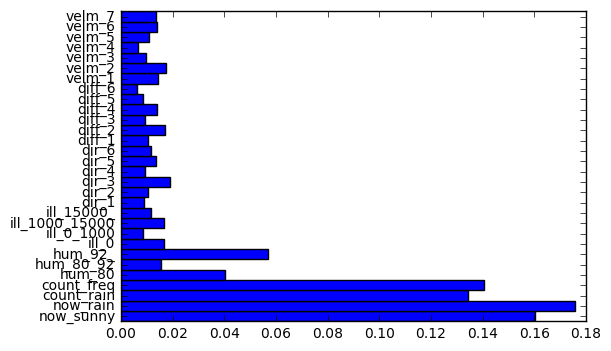

In [22]:
x = np.array(range(30))
bar_width = 1
plt.barh(x, reg.feature_importances_, height = bar_width)
plt.yticks(x + 0.5 , train_data.columns)

In [33]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=5)
clf_tree.fit(train_data, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

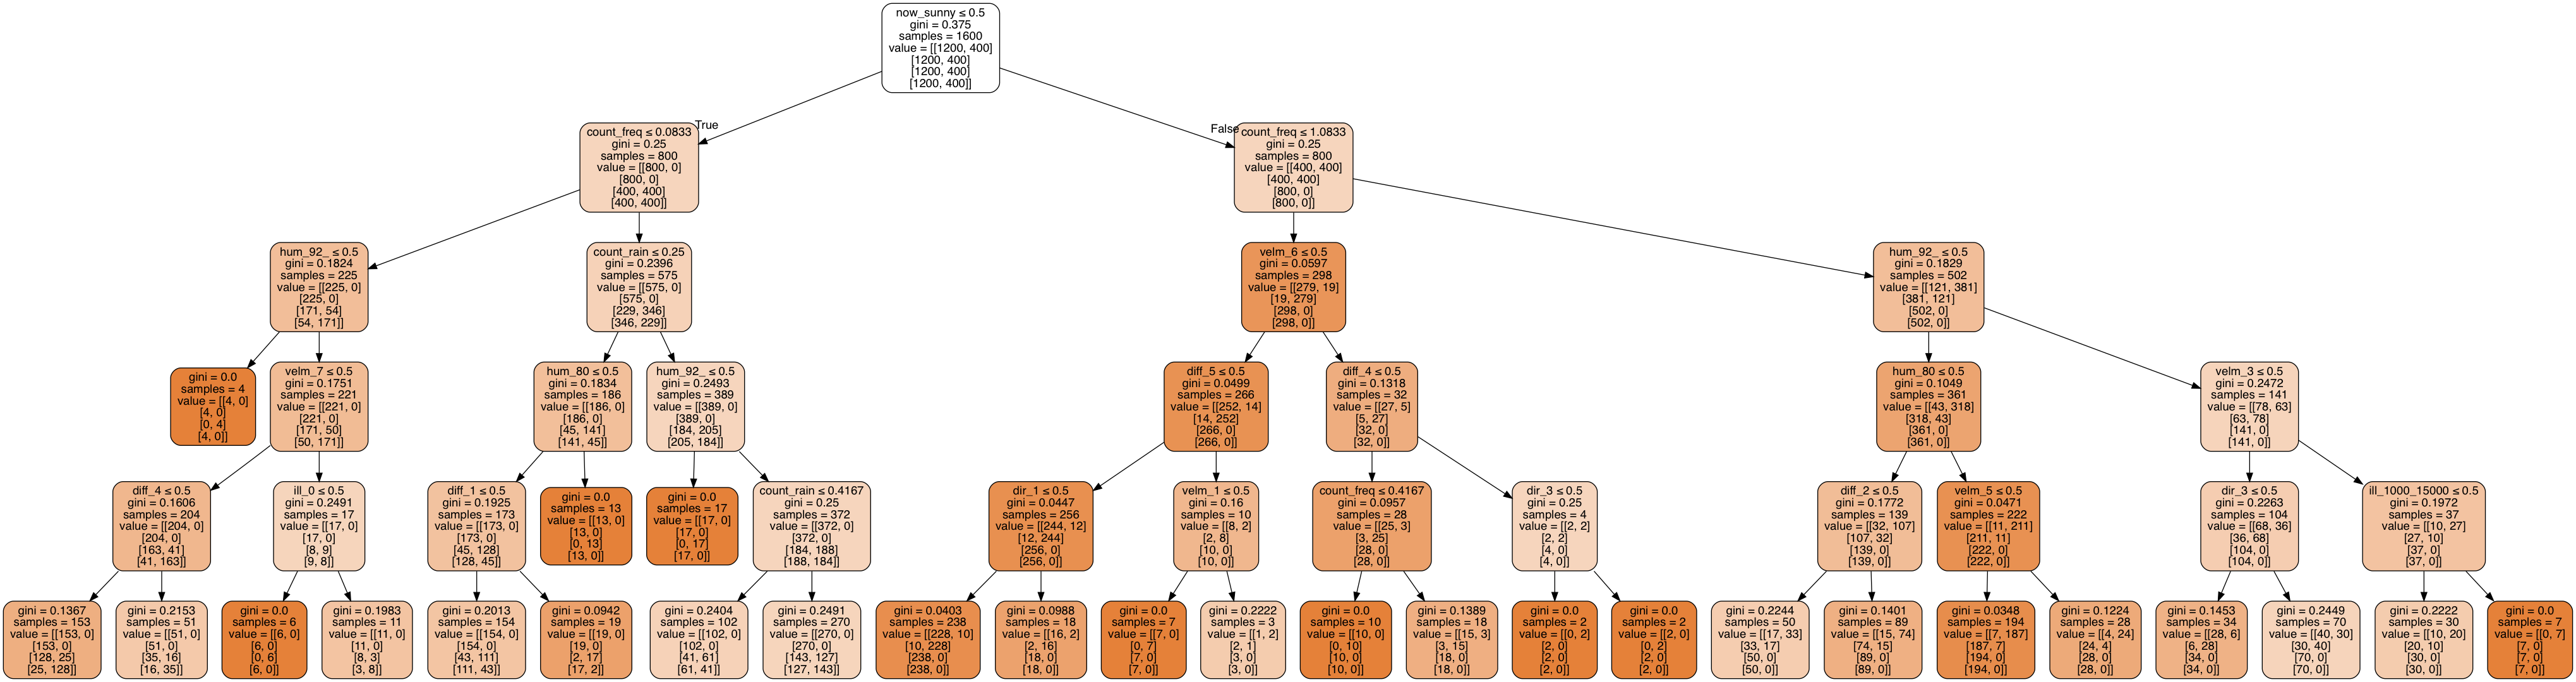

In [40]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf_tree, out_file=dot_data,
                     feature_names=df_rr.columns,
                     class_names=["rr", "rs", "sr", "ss"],  
                     filled=True, rounded=True,  
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [23]:
from sklearn.externals import joblib
joblib.dump(reg, 'reg.pkl') 

['reg.pkl']